## Import necessary libraries

In [62]:
# hellloooooooo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## üì© Read CSV

In [63]:
df = pd.read_csv('heart.csv')                                           # ƒë·ªçc d·ªØ li·ªáu t·ª´ file csv
df.head()                                                               # hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ti√™n c·ªßa data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## üìú Dataset Information
- **Age**: age of the patient
- **Sex**: sex of the patient
    - M: Male
    - F: Female
- **ChestPainType**: chest pain type
    - TA: Typical Angina
    - ATA: Atypical Angina
    - NAP: Non-Anginal Pain
    - ASY: Asymptomatic
- **RestingBP**: resting blood pressure (mm/Hg)
- **Cholesterol**: serum cholesterol (mm/dl)
- **FastingBS**: fasting blood sugar 
    - 1: if FastingBS > 120 mg/dl
    - 0: otherwise
- **RestingECG**: resting electrocardiogram results
    - Normal: Normal
    - ST: having ST-T wave abnormality [T wave inversions and/or ST elevation or depression of > 0.05 mV]
    - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment
    - Up: upsloping
    - Flat: flat
    - Down: downsloping
- **HeartDisease**: output class 
    - 1: heart disease
    - 0: Normal

## üìä EDA

From the above information, we can categorize values in the dataset into these categories:

In [64]:
continuos_f = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]                           # Ki·ªÉu s·ªë
categorical_f = ["ChestPainType", "RestingECG", "ST_Slope"]                                     # Ki·ªÉu ch·ªØ
binaries_f = ["Sex", "FastingBS", "ExerciseAngina"]                                             # Ki·ªÉu nh·ªã ph√¢n (true false or 0 1)

<Figure size 800x550 with 0 Axes>

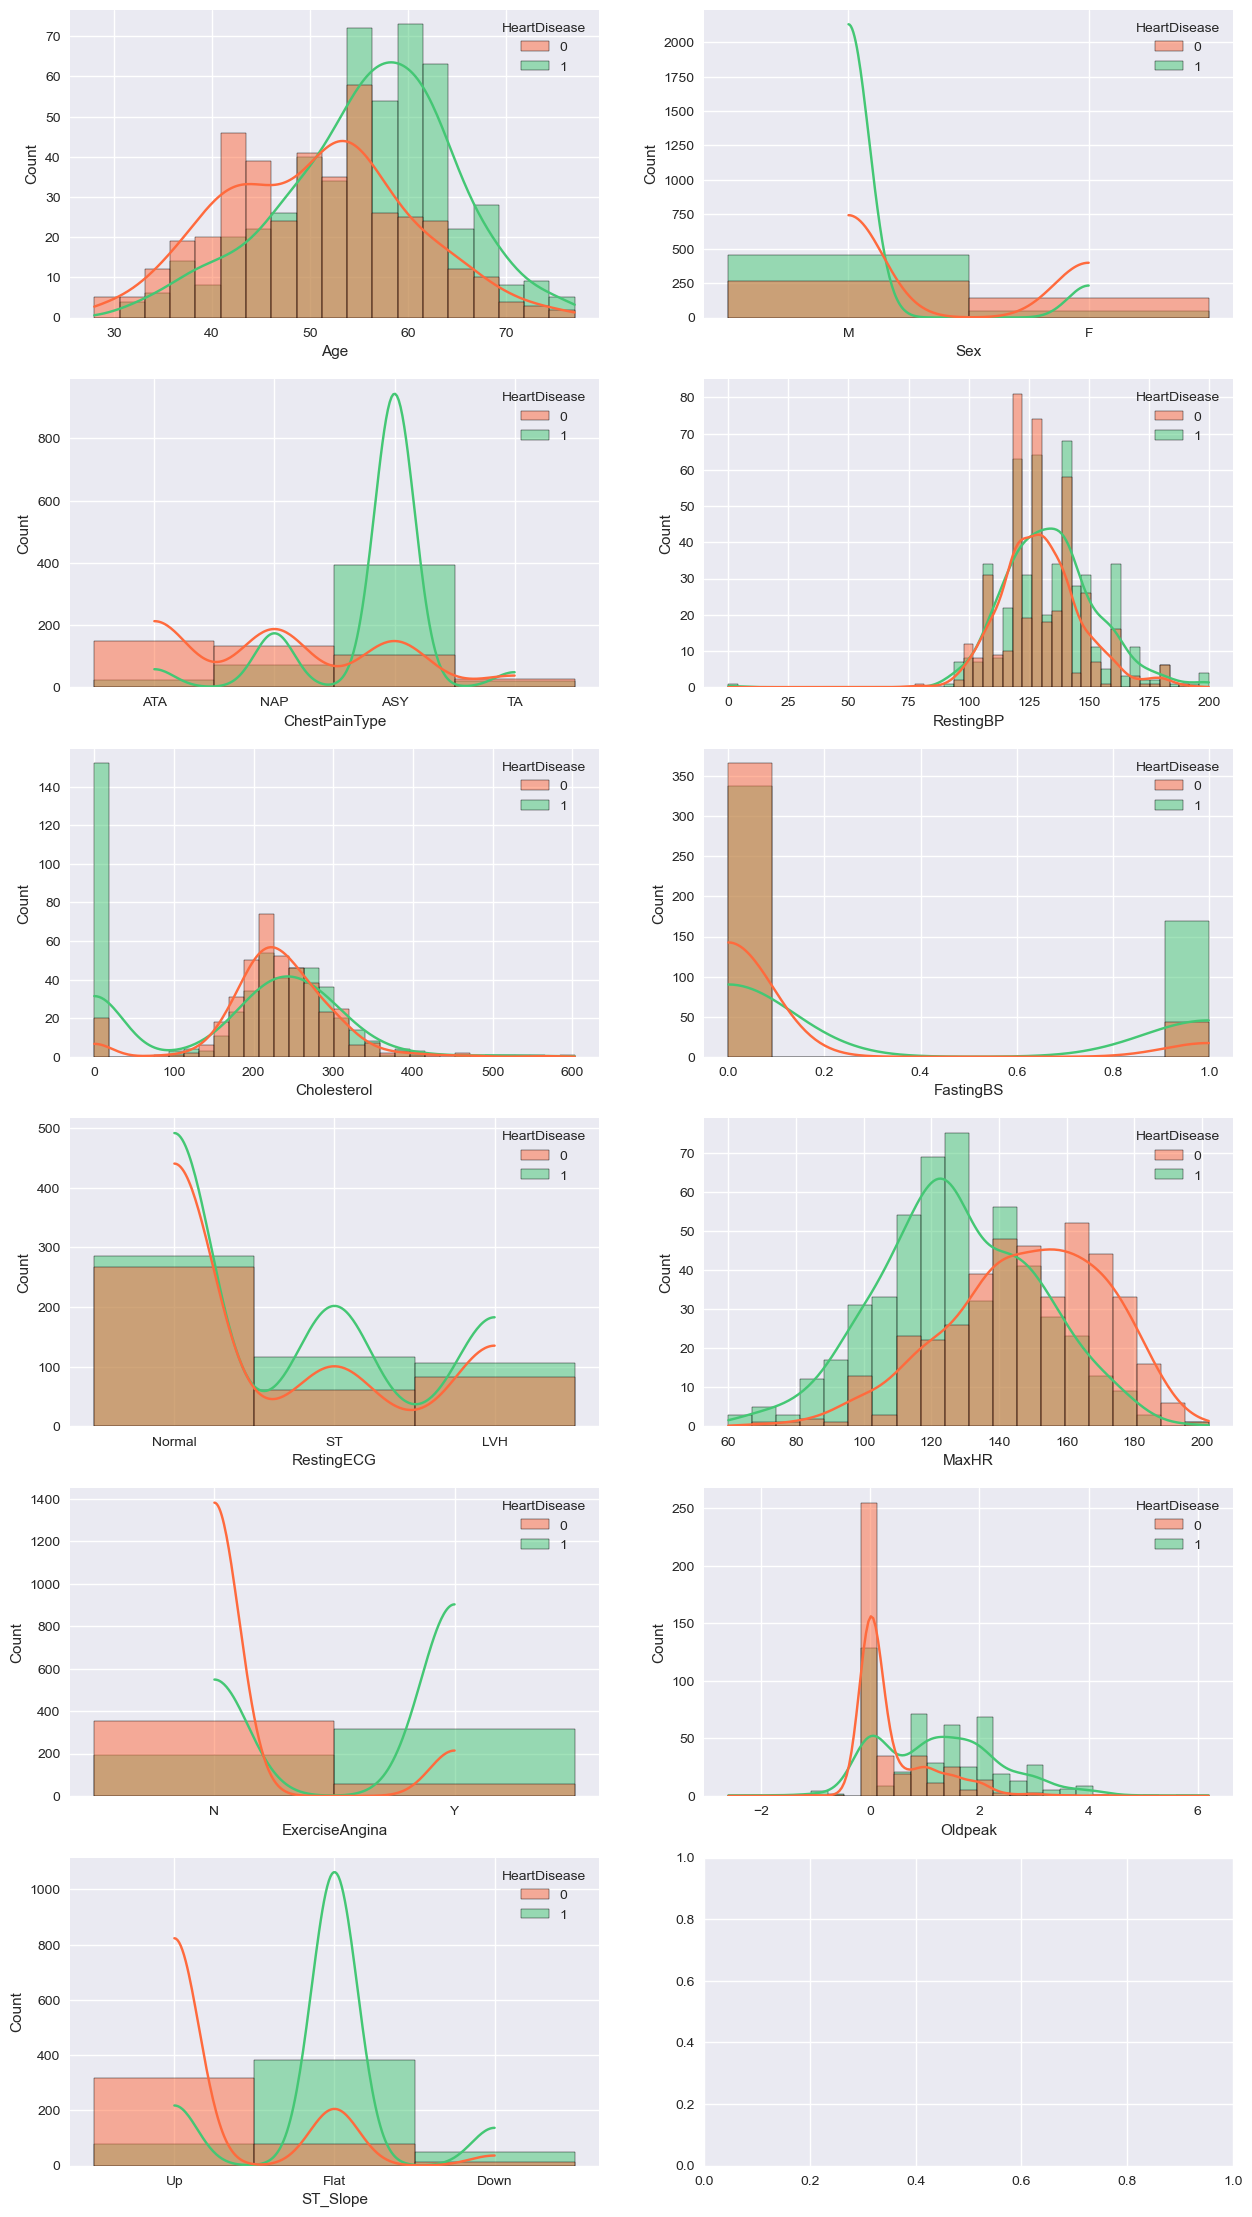

In [65]:

plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = ['#ff6a3d','#44c774']

fig, axs = plt.subplots(6, 2, figsize=(15,28))
i=1
for feature in df.columns:
    if feature not in ["HeartDisease"] and i < 14:
        plt.subplot(6,2,i)
        sns.histplot(data=df, x=feature, kde=True, palette=color, hue='HeartDisease')
        i+=1


 Based on this visualization, we will an analysis:
 + **Age**: We see how the risk of suffering cardiovascular diseases (CVDs) increases with age.
 + **Sex**: Apparently the men have a major risk than women of suffering CVDs.
 + **ChestPainType**: The majority cases of CVDs present absence of chest pain or the usual anginal equivalents. Followed by the cases that present chest pain non-anginal.
 + **RestingBP**: According to the [heart.org's article](https://www.heart.org/en/health-topics/high-blood-pressure/health-threats-from-high-blood-pressure/how-high-blood-pressure-can-lead-to-heart-failure), the high blood pressure can drive to suffering CVDs. We see in this histogram a slight increase in the CVDs cases when increase the resting blood pressure. <span style="color:red; font-weight: bold;">Let's observe that exists zero values of blood pressure, this it is incorrect we must treat them</span>.
 + **Cholesterol**: It is well known that a high level of cholesterol can lead to stroke, heart attack, or even heart failure. However, according to the [Heatline's article](https://www.healthline.com/health/serum-cholesterol) not all serum cholesterol is bad, exist three cholesterol types that compose a serum cholesterol, HDL or 'good' cholesterol, LDL or 'bad' cholesterol and triglycerides(TG), where high HDL levels are better than high LDL and TG levels. The level of serum cholesterol (SC) can be calculated like the sum between levels of HDL, LDL and TG, SC[mm/dl] = HDL[mm/dl] + LDL[mm/dl] + TG[mm/dl], note that we don't know the concentrations of HDL, LDL and TG in serum cholesterol of our dataset, but Heatline get us a reference level to determinate when a pacient have risk of suffering CDVs. A serum cholesterol major than 200 mm/dl is considered a risk factor for health, let'us in our histogram that majority cases of CVDs have major levels that 200 mm/dl. In other hand, <span style="color:red; font-weight: bold;">let's observe that exists zero values and value too high (atypical cases) of serum cholesterol, this it is incorrect we must treat them</span>.
 + **FastingBS**: According to [CDC's article](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=Over%20time%2C%20high%20blood%20sugar,and%20can%20damage%20artery%20walls.), high blood sugar can damage blood vessels and the nerves that control your heart. For this reason is that patients with diabetes have most risk of suffering CVDs. Our dataset reflect this condition, where the majority of patients with high blood sugar have CVDs.
 + **RestingECG**: The majority cases of patients with CVDs present normal resting electrocardiograms, but we observe that in the cases that present ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) the amount of patients with CVDs are two times more than patientes that not suffering CVDs, something similar occurs with cases that present probable or definite left ventricular hypertrophy but to a lesser degree.
 + **MaxHR**: we don't know the conditions in which they were measured this values, so we can't talk about if this values can be to correct. The truth is that patients with CVDs present low values of maximum heart rate, while that patients with normal conditions present values more high.
 + **ExerciseAngina**: Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. But angina is not a disease. It's a symptom of an underlying heart problem, and for this reason that the majority of patients with CVDs present exercise-induced angina.
 + **Oldpeak**: Also called ST segment depression is a factor that relationed with several CVD, but in some cases this depression can be normal. We can observe that patients with CVDs present high values of depression, though also some patients with CVDs present zero values of depression.
 + **ST_slope**: According to [Ecgwaves's article](https://ecgwaves.com/topic/ecg-st-segment-depression-ischemia-infarction-differential-diagnoses/), upsloping ST segment can be generally considered like normal, but so much flat or horizontal ST segment and dowsloping ST segment can be considered like anomalies, and they are present in the majority cases of patients with CVDs as reflected by our histogram.
 

In [66]:

labels = ["Heart attack" , "No heart attack"]
values = [df[df["HeartDisease"] == 1].count().to_numpy()[0],
         df[df["HeartDisease"] == 0].count().to_numpy()[0]]

fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values, 
                             marker_colors=color,
                             textinfo='label+percent'
                            )])
fig.update(layout_title_text='Heart disease', layout_showlegend=False)
fig.show()

Here we can see that our dataset provide 2 classes with a very balance data

## üßπData Cleansing

In [67]:

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 918 rows and 12 columns in the dataset


### 1. **Duplicate** and **Null value** Detection

In [68]:

print(f'There are {df.duplicated().sum()} duplicated value in our dataset')

There are 0 duplicated value in our dataset


In [69]:

print('Total null value in each columns')
print(df.isnull().sum())

Total null value in each columns
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


So there is no duplicate and null value which is great. <br>
##### Now we look more into what **data types** are there.

In [70]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 2. **Outlier** Detection

We have previously seen that features like cholesterol and resting blood pressure present atypical cases, this cases not represent the condition of general population and this data type we don't useful to train our model of predictions, let's see how to treat them:

In [71]:

def detect_outliers(label=None):
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)
    IQR = Q3 - Q1
    interval = ((df[label] > Q1 - 1.5*IQR) & (df[label] < Q3 + 1.5*IQR))
    return df[interval], df[~interval]

def assign_mean(df_out, not_df_out, label=None):
    df.loc[df_out[df_out["HeartDisease"] == 0].index, label] = not_df_out[not_df_out["HeartDisease"] == 0][label].mean()
    df.loc[df_out[df_out["HeartDisease"] == 1].index, label] = not_df_out[not_df_out["HeartDisease"] == 1][label].mean()
    return

def delete_outliers(df_out):
    return df.drop(df_out.index)

#### a. Cholesterol

<AxesSubplot:xlabel='Cholesterol'>

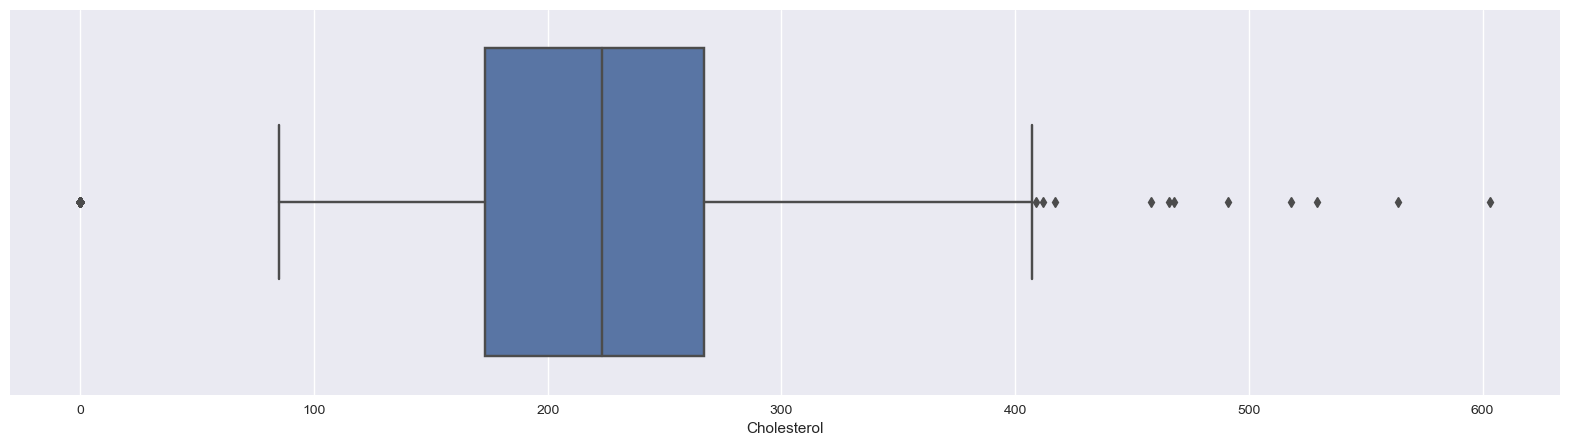

In [72]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="Cholesterol")

In [73]:
not_df_out_ch, df_out_ch = detect_outliers('Cholesterol')
print(f'Outliers in cholesterol represent the {round((df_out_ch.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_ch

Outliers in cholesterol represent the 19.93% of our dataset


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
28     127              N      0.0       Up             0  
30     130              N      0.0     Flat             1  
69     170              N      0.0       Up             0  
76     130              N      0.0     Flat             1  
103    152              Y      1.0     Flat             1  
..     ...            ...      ...      ...           ...  
535    122              Y      1.0     Flat             1  
536    119              Y      1.2     Flat             1  
616    160              N      1.6     Flat             0  
667    157              N      0.8       Up             0  
796    150              Y      1.9     Flat             1  

[183 rows x 12 columns]

These outliers represent the 19.93% of our dataset. There are some of them is zero values (these are human errors) <br>
We think the best solution is to deleted those zero while the rest of the outliers will be assigned with the mean value of cholesterol column. Because we just cant delete ~20% of the dataset.

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

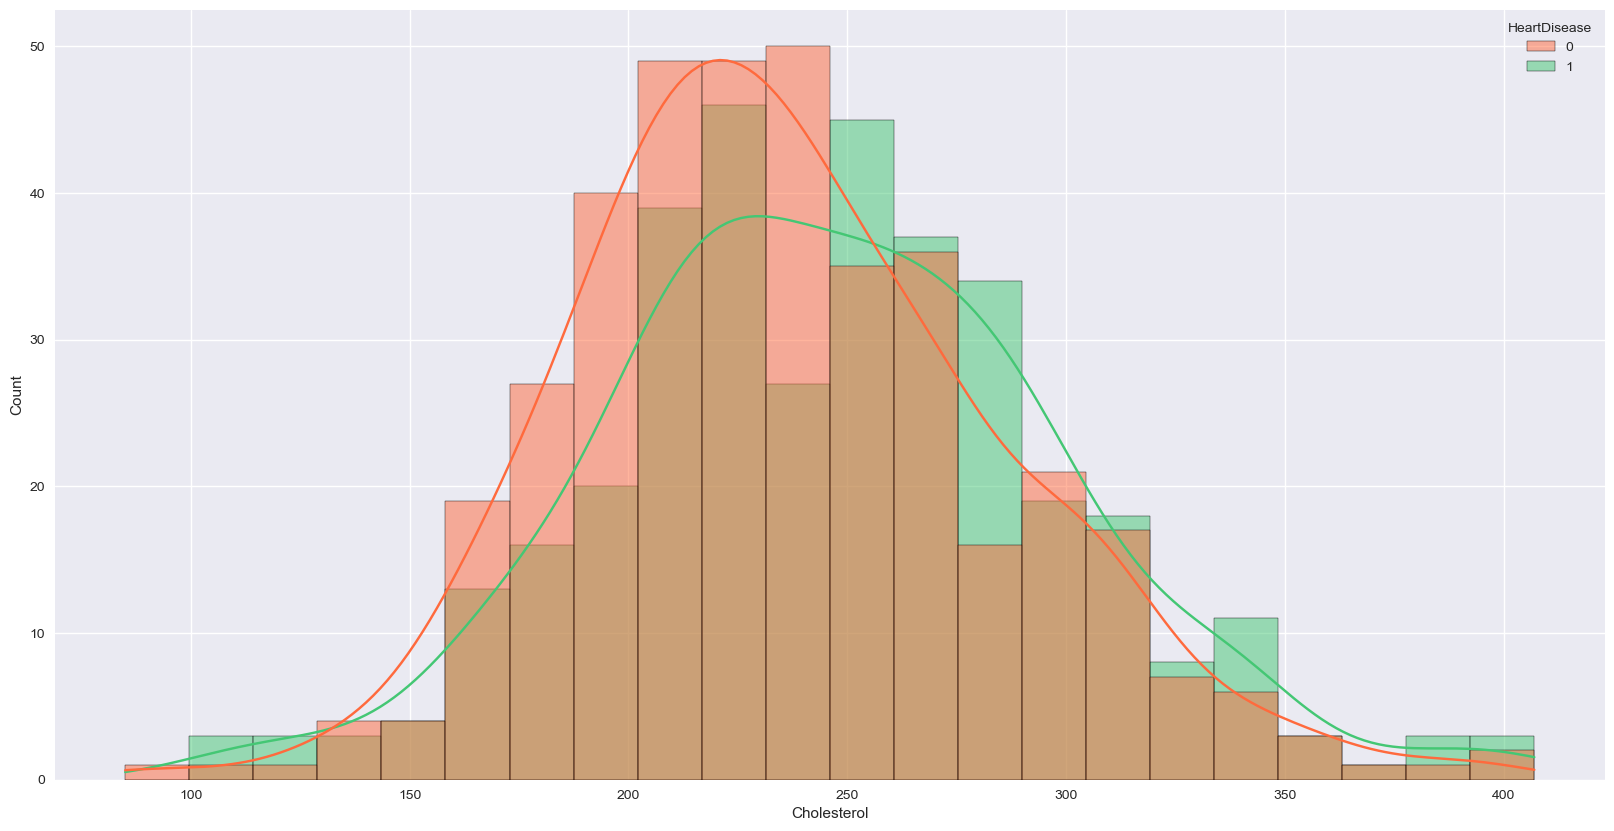

In [74]:
df = delete_outliers(df_out_ch[df_out_ch["Cholesterol"] == 0])
assign_mean(df_out_ch[df_out_ch["Cholesterol"] != 0], not_df_out_ch, 'Cholesterol')

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Cholesterol', kde=True, palette=color, hue='HeartDisease')

#### b. Resting Blood Pressure

<AxesSubplot:xlabel='RestingBP'>

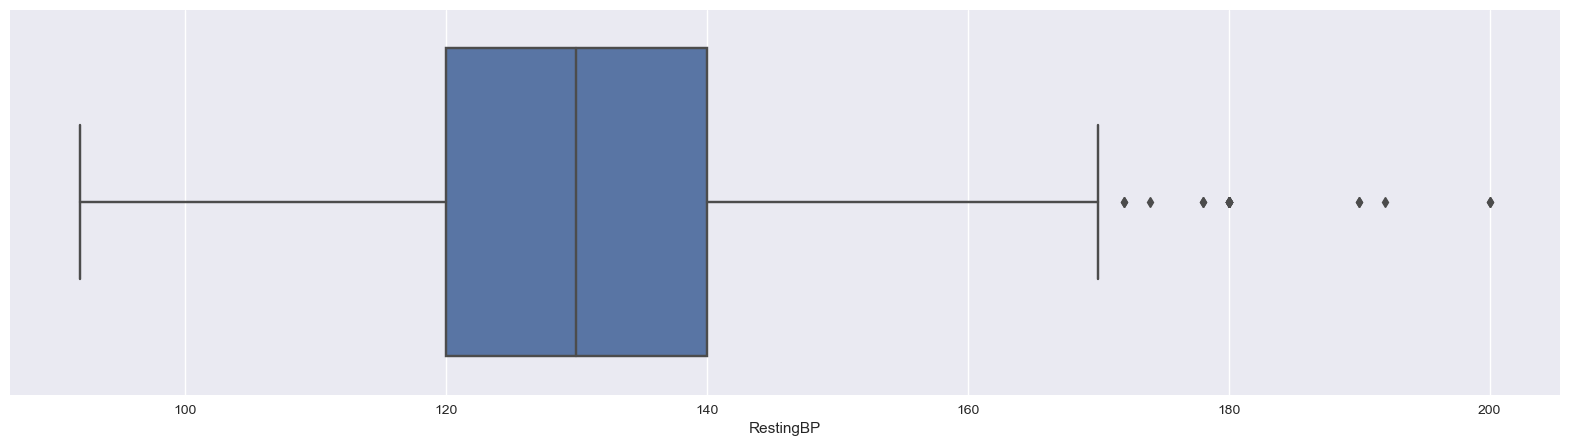

In [75]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="RestingBP")

In [76]:
not_df_out_rbp, df_out_rbp = detect_outliers('RestingBP')
print(f'Outliers in resting blood pressure represent the {round((df_out_rbp.shape[0]*100)/df.shape[0], 2)}% of our dataset')
df_out_rbp

Outliers in resting blood pressure represent the 4.29% of our dataset


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
86    65   M           ASY        170        263.0          1     Normal   
109   39   M           ATA        190        241.0          0     Normal   
123   58   F           ATA        180        393.0          0     Normal   
132   56   M           ASY        170        388.0          0         ST   
189   53   M           ASY        180        285.0          0         ST   
190   46   M           ASY        180        280.0          0         ST   
191   50   M           ATA        170        209.0          0         ST   
215   30   F            TA        170        237.0          0         ST   
241   54   M           ASY        200        198.0          0     Normal   
274   45   F           ATA        180        295.0          0     Normal   
275   59   M           NAP        180        213.0          0     Normal   
277   52   M           ASY        170        223.0          0     Normal   
278   57   F           ASY        180        347.0          0         ST   
432   63   M           ASY        170        177.0          0     Normal   
491   75   M           ASY        170        203.0          1         ST   
543   70   M           ASY        170        192.0          0         ST   
550   55   M           ASY        172        260.0          0     Normal   
585   57   M           ATA        180        285.0          1         ST   
592   61   M           ASY        190        287.0          1        LVH   
648   59   M           ASY        170        326.0          0        LVH   
673   59   F           ASY        174        249.0          0     Normal   
702   59   M            TA        178        270.0          0        LVH   
725   55   F           ASY        180        327.0          0         ST   
732   56   F           ASY        200        288.0          1        LVH   
759   54   M           ATA        192        283.0          0        LVH   
774   66   F           ASY        178        228.0          1     Normal   
780   64   F           ASY        180        325.0          0     Normal   
825   59   M            TA        170        288.0          0        LVH   
855   68   M           NAP        180        274.0          1        LVH   
880   52   M           NAP        172        199.0          1     Normal   
890   64   M            TA        170        227.0          0        LVH   
901   58   F           ASY        170        225.0          1        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
86     112              Y      2.0     Flat             1  
109    106              N      0.0       Up             0  
123    110              Y      1.0     Flat             1  
132    122              Y      2.0     Flat             1  
189    120              Y      1.5     Flat             1  
190    120              N      0.0       Up             0  
191    116              N      0.0       Up             0  
215    170              N      0.0       Up             0  
241    142              Y      2.0     Flat             1  
274    180              N      0.0       Up             0  
275    100              N      0.0       Up             0  
277    126              Y      1.5     Flat             1  
278    126              Y      0.8     Flat             0  
432     84              Y      2.5     Down             1  
491    108              N      0.0     Flat             1  
543    129              Y      3.0     Down             1  
550     73              N      2.0     Flat             1  
585    120              N      0.8     Flat             1  
592    150              Y      2.0     Down             1  
648    140              Y      3.4     Down             1  
673    143              Y      0.0     Flat             1  
702    145              N      4.2     Down             0  
725    117              Y      3.4     Flat             1  
732    133              Y      4.0     Down             

In this case the outliers in resting blood pressure represent the 4.58% of total cases, we can delete them.

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

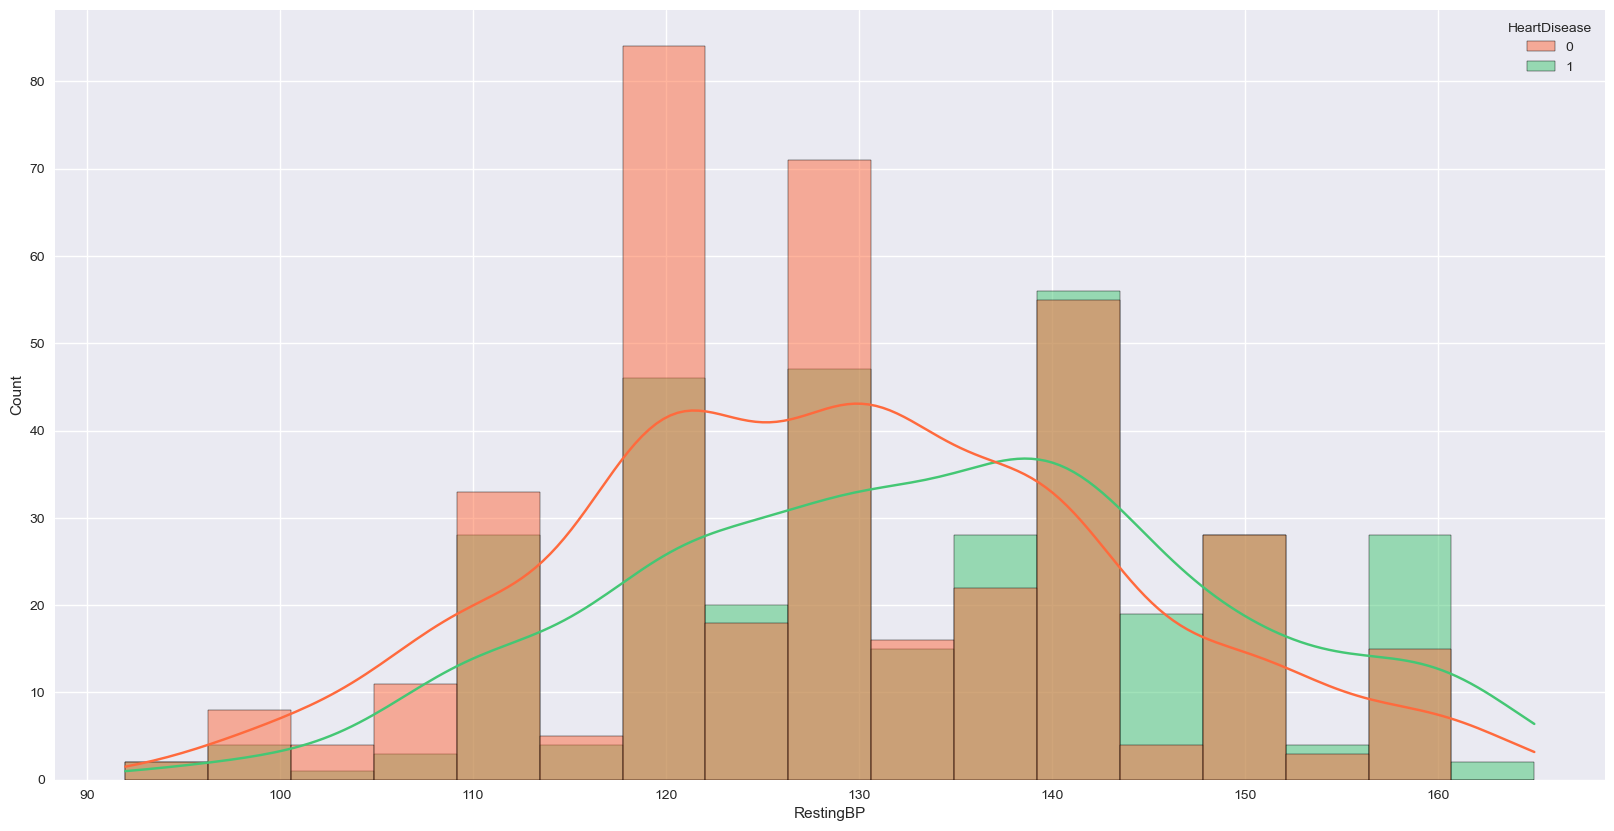

In [77]:
df = delete_outliers(df_out_rbp)
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='RestingBP', kde=True, palette=color, hue='HeartDisease')

## üî¢ Features encoding

### 1. Binary features enconding

In [78]:

df["Sex"] = df["Sex"].map({'M':1, 'F':0})
df["ExerciseAngina"] = df["ExerciseAngina"].map({'N':0, 'Y':1})
df

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140        289.0          0     Normal   
1     49    0           NAP        160        180.0          0     Normal   
2     37    1           ATA        130        283.0          0         ST   
3     48    0           ASY        138        214.0          0     Normal   
4     54    1           NAP        150        195.0          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110        264.0          0     Normal   
914   68    1           ASY        144        193.0          1     Normal   
915   57    1           ASY        130        131.0          0     Normal   
916   57    0           ATA        130        236.0          0        LVH   
917   38    1           NAP        138        175.0          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172               0      0.0       Up             0  
1      156               0      1.0     Flat             1  
2       98               0      0.0       Up             0  
3      108               1      1.5     Flat             1  
4      122               0      0.0       Up             0  
..     ...             ...      ...      ...           ...  
913    132               0      1.2     Flat             1  
914    141               0      3.4     Flat             1  
915    115               1      1.2     Flat             1  
916    174               0      0.0     Flat             1  
917    173               0      0.0       Up             0  

[714 rows x 12 columns]

### 2. Data Binning

In [79]:

df_bin = df.copy()
for feature in continuos_f:
    bins = 5
    df_bin[feature] = pd.cut(df[feature], bins=bins, labels=range(bins)).astype(np.int64)
df_bin

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0      1    1           ATA          3            3          0     Normal   
1      2    0           NAP          4            1          0     Normal   
2      0    1           ATA          2            3          0         ST   
3      2    0           ASY          3            2          0     Normal   
4      2    1           NAP          3            1          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913    1    1            TA          1            2          0     Normal   
914    4    1           ASY          3            1          1     Normal   
915    2    1           ASY          2            0          0     Normal   
916    2    0           ATA          2            2          0        LVH   
917    1    1           NAP          3            1          0     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0        3               0        0       Up             0  
1        3               0        0     Flat             1  
2        1               0        0       Up             0  
3        1               1        1     Flat             1  
4        1               0        0       Up             0  
..     ...             ...      ...      ...           ...  
913      2               0        1     Flat             1  
914      2               0        2     Flat             1  
915      1               1        1     Flat             1  
916      3               0        0     Flat             1  
917      3               0        0       Up             0  

[714 rows x 12 columns]

### 3. One-hot encoding

In [80]:
df_dumm = pd.get_dummies(df_bin, columns = categorical_f+continuos_f)
df_dumm

Sex  FastingBS  ExerciseAngina  HeartDisease  ChestPainType_ASY  \
0      1          0               0             0                  0   
1      0          0               0             1                  0   
2      1          0               0             0                  0   
3      0          0               1             1                  1   
4      1          0               0             0                  0   
..   ...        ...             ...           ...                ...   
913    1          0               0             1                  0   
914    1          1               0             1                  1   
915    1          0               1             1                  1   
916    0          0               0             1                  0   
917    1          0               0             0                  0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  \
0                    1                  0                 0               0   
1                    0                  1                 0               0   
2                    1                  0                 0               0   
3                    0                  0                 0               0   
4                    0                  1                 0               0   
..                 ...                ...               ...             ...   
913                  0                  0                 1               0   
914                  0                  0                 0               0   
915                  0                  0                 0               0   
916                  1                  0                 0               1   
917                  0                  1                 0               0   

     RestingECG_Normal  ...  MaxHR_0  MaxHR_1  MaxHR_2  MaxHR_3  MaxHR_4  \
0                    1  ...        0        0        0        1        0   
1                    1  ...        0        0        0        1        0   
2                    0  ...        0        1        0        0        0   
3                    1  ...        0        1        0        0        0   
4                    1  ...        0        1        0        0        0   
..                 ...  ...      ...      ...      ...      ...      ...   
913                  1  ...        0        0        1        0        0   
914                  1  ...        0        0        1        0        0   
915                  1  ...        0        1        0        0        0   
916                  0  ...        0        0        0        1        0   
917                  1  ...        0        0        0        1        0   

     Oldpeak_0  Oldpeak_1  Oldpeak_2  Oldpeak_3  Oldpeak_4  
0            1          0          0          0          0  
1            1          0          0          0          0  
2            1          0          0          0          0  
3            0          1          0          0          0  
4            1          0          0          0          0  
..         ...        ...        ...        ...        ...  
913          0          1          0          0          0  
914          0          0          1          0          0  
915          0          1          0          0          0  
916          1          0          0          0          0  
917          1          0          0          0          0  

[714 rows x 39 columns]

## ‚öñÔ∏è Correlations

<AxesSubplot:>

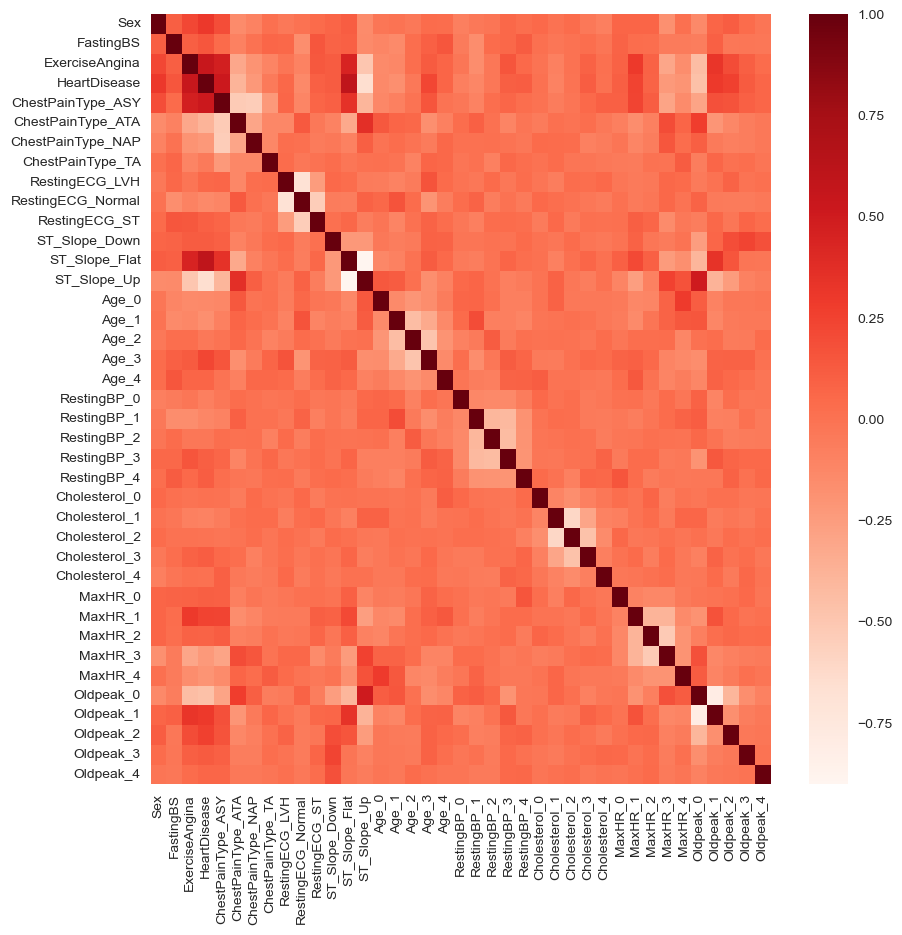

In [81]:

plt.figure(figsize=(10,10))
cor = df_dumm.corr()
sns.heatmap(cor, cmap=plt.cm.Reds, fmt='.2f')


It is a huge matrix with too many features. We will check the correlation only with respect to **HeartDisease**

Text(0.5, 1.0, 'Correlation with HeartDisease')

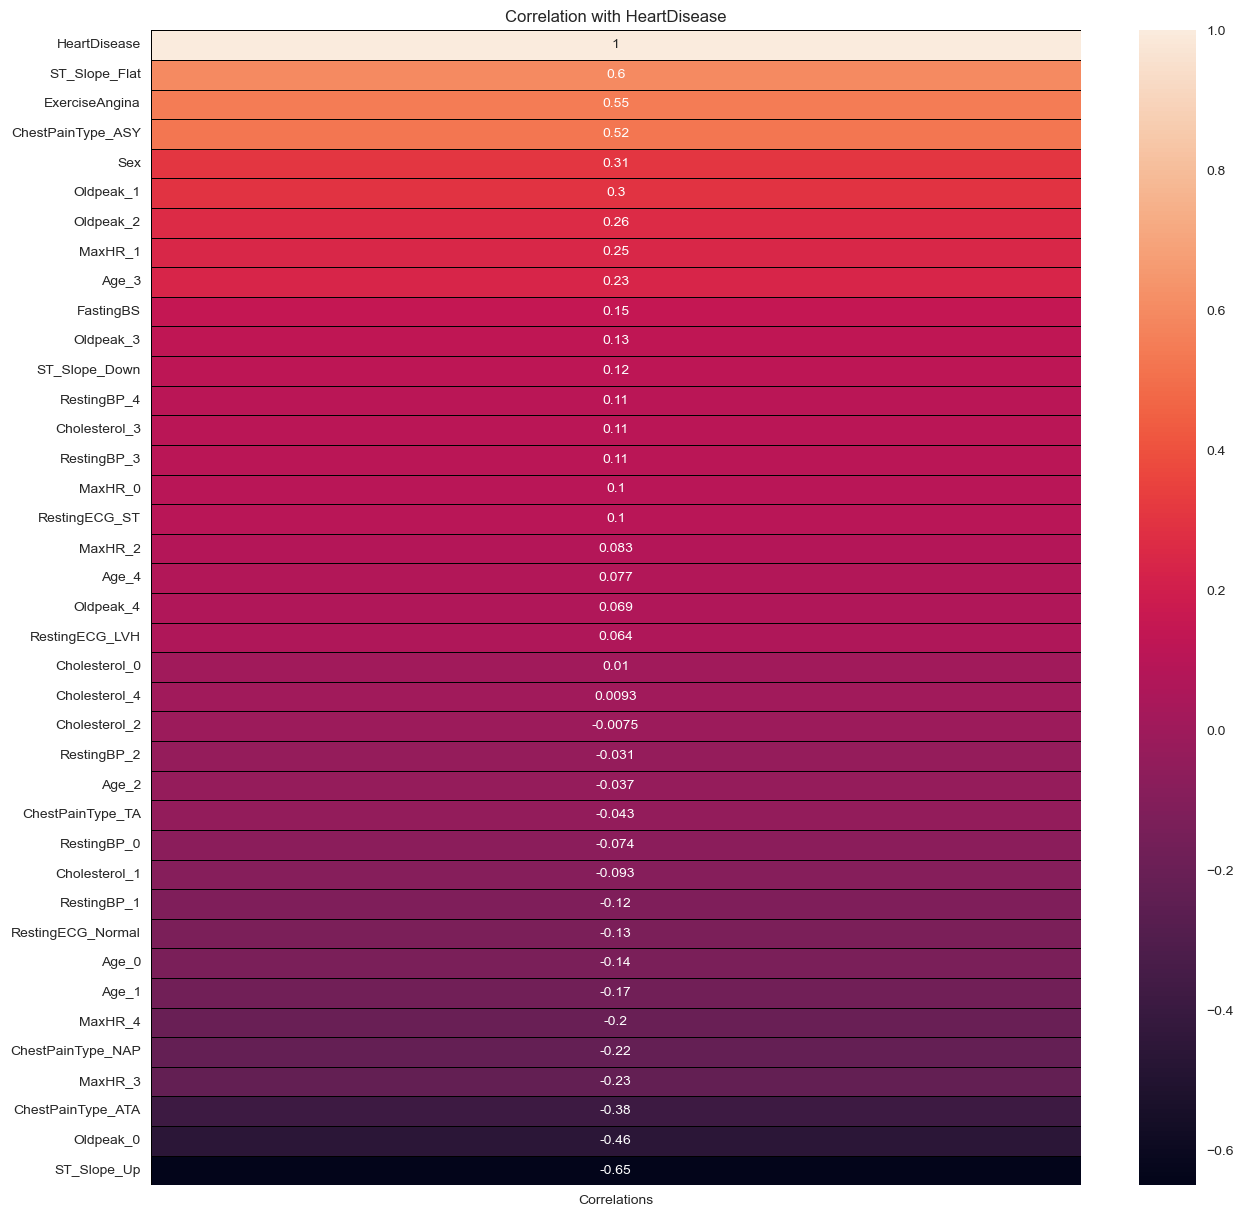

In [82]:

corr = df_dumm.corrwith(df_dumm['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (15, 15))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black')
plt.title('Correlation with HeartDisease')

## ‚úÇÔ∏èTraining and Test Sets Split

In [22]:
# ƒëo·∫°n code ƒë∆∞·ª£c t·∫°o b·ªüi b·∫£n sao c·ªßa df_dumm
# sau ƒë√≥ bi·∫øn x ƒë∆∞·ª£c t·∫°o th√†nh v√† b·ªè c·ªôt HeartDisease t·ª´ df_clean 
# D·ªØ li·ªáu sau ƒë√≥ ƒë∆∞·ª£c chia th√†nh c√°c t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra s·ª≠ d·ª•ng h√†m train_test_split t·ª´ scikit-learn. 
# Tham s·ªë test_size ch·ªâ ƒë·ªãnh r·∫±ng 20% d·ªØ li·ªáu s·∫Ω ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ki·ªÉm tra v√† ph·∫ßn c√≤n l·∫°i ƒë·ªÉ hu·∫•n luy·ªán. 
# Tham s·ªë random_state ƒë·∫£m b·∫£o r·∫±ng vi·ªác chia l√† c√≥ th·ªÉ t√°i s·∫£n xu·∫•t. 
# Tham s·ªë stratify ƒë·∫£m b·∫£o r·∫±ng t·ª∑ l·ªá c√°c l·ªõp trong c·∫£ hai t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra gi·ªëng nhau v·ªõi t·ª∑ l·ªá trong t·∫≠p d·ªØ li·ªáu g·ªëc.
df_clean = df_dumm.copy()

X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

## ü§ñ Modeling

We will train four models to tasks of classification also we will use grid search to tuning models' hyperparameters, additionally we will evaluate their performance with confusion matrix where:

<table>
    <tr>
        <th colspan="2" rowspan="2"></th>
        <th colspan="2">Predicted</th>
    </tr>
    <tr>
        <td>Negative</td>
        <td>Positive</td>
    </tr>
    <tr>
        <th rowspan="2">Actual</th>
        <td>Negative</td>
        <td>TN</td>
        <td>FP</td>
    </tr>
    <tr>
        <td>Positive</td>
        <td>FN</td>
        <td>TP</td>
    </tr>
</table>

Taking into account that:
+ Case negative: Patients with normal conditions (NC)
+ Case positive: Patients with CVDs
+ TN: The prediction tells us that the patient has NC when actually has NC.
+ TP: The prediction tells us that the patient has CVDs when actually has CVDs.
+ FN: The prediction tells us that the patient has NC when actually has CVDs.
+ FP: The prediction tells us that the patient has CVDs when actually has NC.

And because our dataset has very balanced classes so we decided to use ROC curve to measure the performance of a classifier

**Function to plot ROC curve and give the scores of models**

In [23]:
# H√†m v·∫Ω_ƒë∆∞·ªùng_roc nh·∫≠n ba tham s·ªë: fpr, tpr, v√† m·ªôt tham s·ªë t√πy ch·ªçn label. N√≥ s·ª≠ d·ª•ng th∆∞ vi·ªán matplotlib ƒë·ªÉ v·∫Ω ƒë∆∞·ªùng cong ROC (receiver operating characteristic) 
# v·ªõi t·ª∑ l·ªá d∆∞∆°ng t√≠nh gi·∫£ (fpr) v√† t·ª∑ l·ªá d∆∞∆°ng t√≠nh th·ª±c (tpr) ƒë√£ cho. H√†m c≈©ng v·∫Ω m·ªôt ƒë∆∞·ªùng ch√©o t·ª´ (0, 0) ƒë·∫øn (1 , 1) b·∫±ng m·ªôt ƒë∆∞·ªùng n√©t ƒë·ª©t m√†u ƒëen. 
# Tr·ª•c x ƒë∆∞·ª£c ghi nh√£n ‚ÄúT·ª∑ l·ªá d∆∞∆°ng t√≠nh gi·∫£‚Äù v√† tr·ª•c y ƒë∆∞·ª£c ghi nh√£n ‚ÄúT·ª∑ l·ªá d∆∞∆°ng t√≠nh th·ª±c‚Äù.
# H√†m in_ƒëi·ªÉm nh·∫≠n hai tham s·ªë: y v√† y_d·ª±_ƒëo√°n. N√≥ t√≠nh to√°n c√°c ƒëi·ªÉm s·ªë c·ªßa c√°c d·ª± ƒëo√°n (y_d·ª±_ƒëo√°n) so v·ªõi c√°c nh√£n ch√¢n th·∫≠t (y) s·ª≠ d·ª•ng c√°c h√†m t·ª´ th∆∞ vi·ªán scikit-learn. 
# C√°c ƒëi·ªÉm s·ªë n√†y ƒë∆∞·ª£c in ra m√†n h√¨nh console.
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Poisitive Rate")
    
def print_scores(y, y_pred):
    ac, pr, rc, f1 = accuracy_score(y, y_pred)*100, precision_score(y, y_pred)*100, recall_score(y, y_pred)*100, f1_score(y, y_pred, average='weighted')*100
    print(f'Accuracy: {ac}')
    print(f'Precision: {pr}')
    print(f'Recall: {rc}')
    print(f'F1-score: {f1}')
    return {'Accuracy': ac, 'Precision':pr, 'Recall':rc, 'F1-score':f1}

**State Parameters used for GridSearchCV**

In [24]:
# Ph√©p ƒëo ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh l√† recall v√† s·∫Ω th·ª±c hi·ªán ki·ªÉm ƒë·ªãnh ch√©o v·ªõi 15 l·∫ßn.
metric = 'recall'
cv = 15

## üü° Logistic Regression Classifier

#### We train the model

In [25]:
param_grid = [{
    "C": np.linspace(1, 1.5, 10),
    'penalty' : ['l1','l2'],
}]

lgr_clf = LogisticRegression()
grid_lgr = GridSearchCV(lgr_clf, param_grid, scoring=metric, cv=cv)
grid_lgr.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.        , 1.05555556, 1.11111111, 1.16666667, 1.22222222,
       1.27777778, 1.33333333, 1.38888889, 1.44444444, 1.5       ]),
                          'penalty': ['l1', 'l2']}],
             scoring='recall')

In [26]:
best_lgr_clf = grid_lgr.best_estimator_
grid_lgr.best_params_

{'C': 1.0, 'penalty': 'l2'}

<AxesSubplot:>

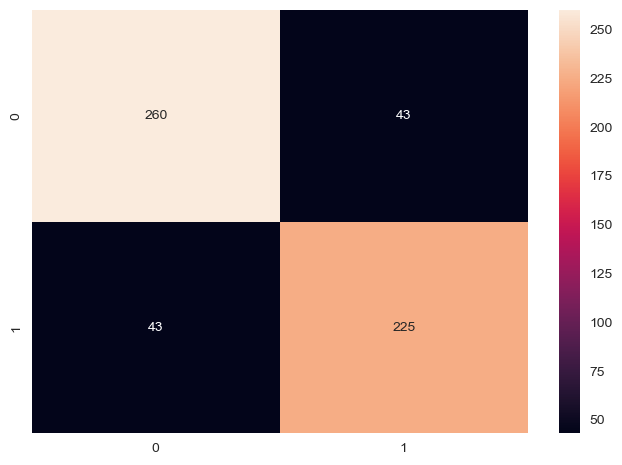

In [27]:
y_train_pred = cross_val_predict(best_lgr_clf, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

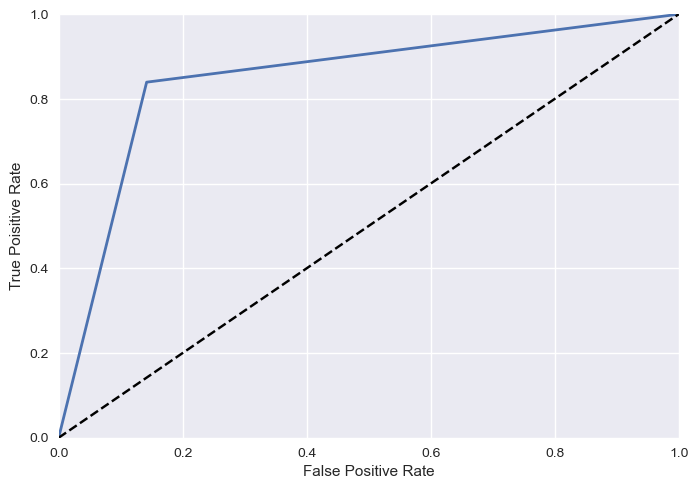

In [28]:
fpr_lgr, tpr_lgr, thresholds_lgr = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_lgr, tpr_lgr, "Logistic Regression")
plt.show()

In [29]:
roc_auc_score(y_train, y_train_pred)

0.848819023693414

#### We evaluate the model with test set:

<AxesSubplot:>

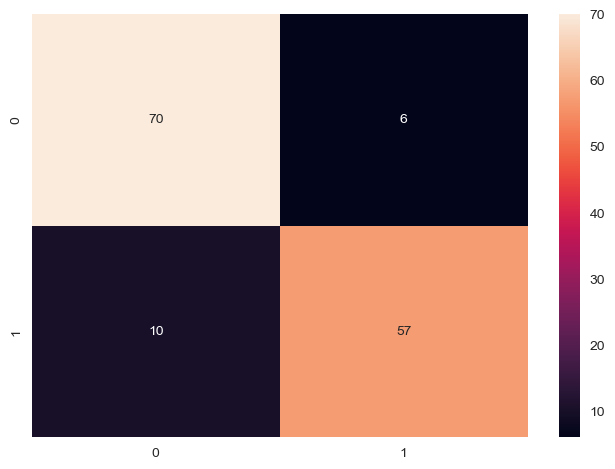

In [30]:
y_test_pred = cross_val_predict(best_lgr_clf, X_test, y_test, cv=cv)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

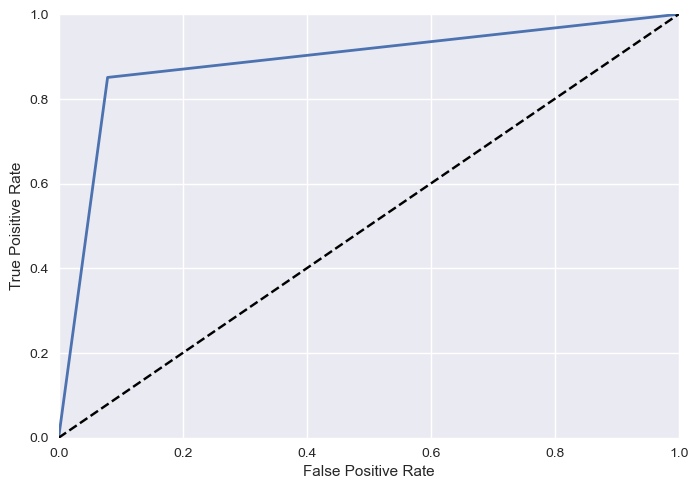

In [31]:
fpr_lgr, tpr_lgr, thresholds_lgr = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_lgr, tpr_lgr, "Logistic Regression")
plt.show()

In [32]:
roc_auc_score(y_test, y_test_pred)

0.8858994501178319

#### We calculate the scores

In [33]:
lgr_scores = print_scores(y_test, y_test_pred)

Accuracy: 88.81118881118881
Precision: 90.47619047619048
Recall: 85.07462686567165
F1-score: 88.78249955173033


## üü£ K-Nearest Neighbors Classifier

#### We train the model

In [34]:
param_grid = [{
    'n_neighbors':np.arange(5, 21),
    'weights':['uniform', 'distance'],
    'p':[1, 2],
}]

knn_clf = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_clf, param_grid, cv=cv, scoring=metric)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='recall')

In [35]:
best_knn_clf = grid_knn.best_estimator_
grid_knn.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

<AxesSubplot:>

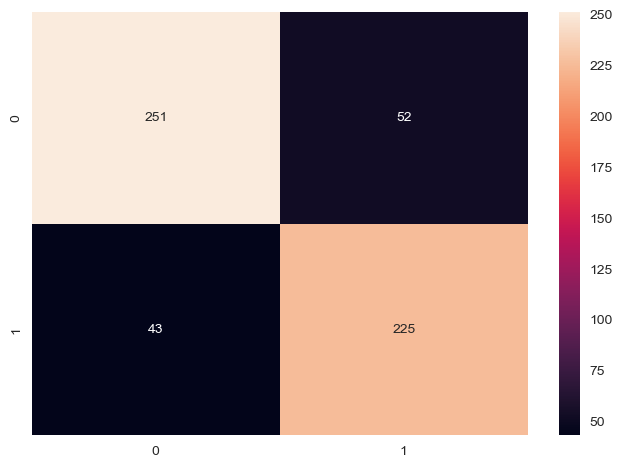

In [36]:
y_train_pred = cross_val_predict(best_knn_clf, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

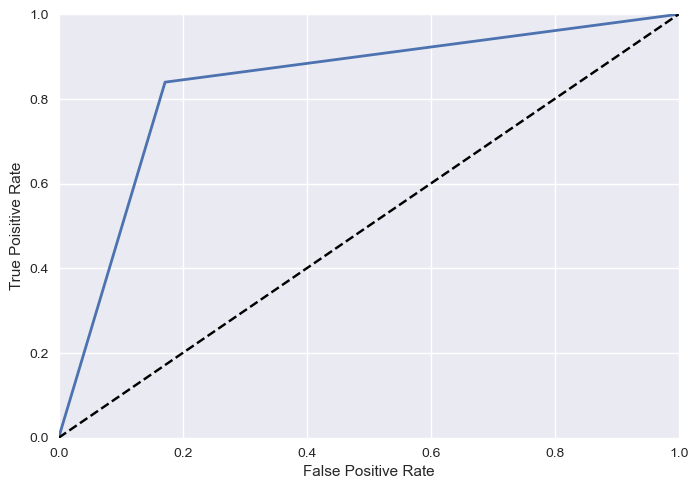

In [37]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbors")
plt.show()

In [38]:
roc_auc_score(y_train, y_train_pred)

0.8339675385448992

#### We evaluate the model with test set:

<AxesSubplot:>

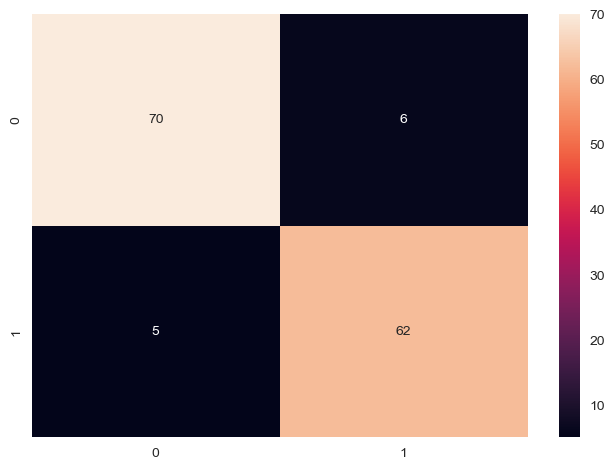

In [39]:
y_test_pred = cross_val_predict(best_knn_clf, X_test, y_test, cv=cv)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

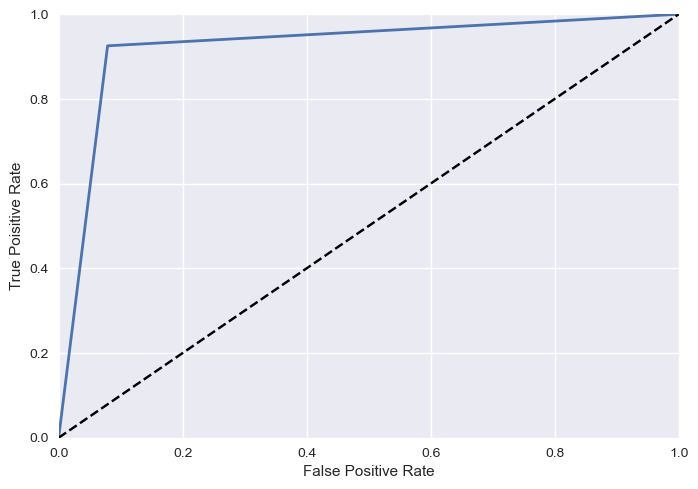

In [40]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbors")
plt.show()

In [41]:
roc_auc_score(y_test, y_test_pred)

0.9232128829536528

#### We calculate the scores

In [42]:
knn_scores = print_scores(y_test, y_test_pred)

Accuracy: 92.3076923076923
Precision: 91.17647058823529
Recall: 92.53731343283582
F1-score: 92.31071111865813


## üü† Support Vector Machine Classifier

#### We train the model

In [43]:
param_grid = [{
    "C": np.linspace(1, 1.5, 10),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto']
}]

svc_clf = SVC()
grid_svc = GridSearchCV(svc_clf, param_grid, scoring=metric, cv=cv)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=SVC(),
             param_grid=[{'C': array([1.        , 1.05555556, 1.11111111, 1.16666667, 1.22222222,
       1.27777778, 1.33333333, 1.38888889, 1.44444444, 1.5       ]),
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='recall')

In [44]:
best_svc_clf = grid_svc.best_estimator_
grid_svc.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

<AxesSubplot:>

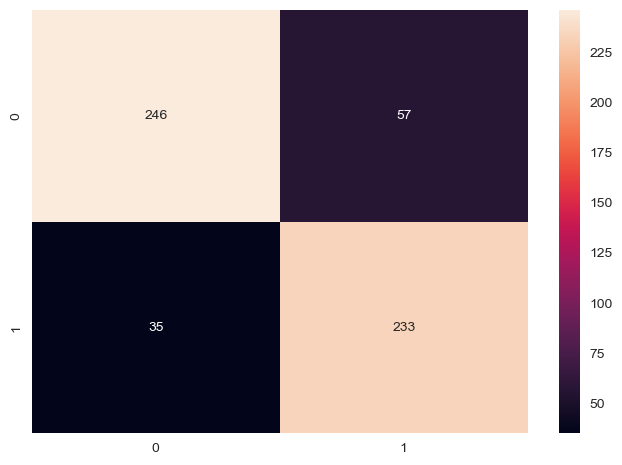

In [45]:
y_train_pred = cross_val_predict(best_svc_clf, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

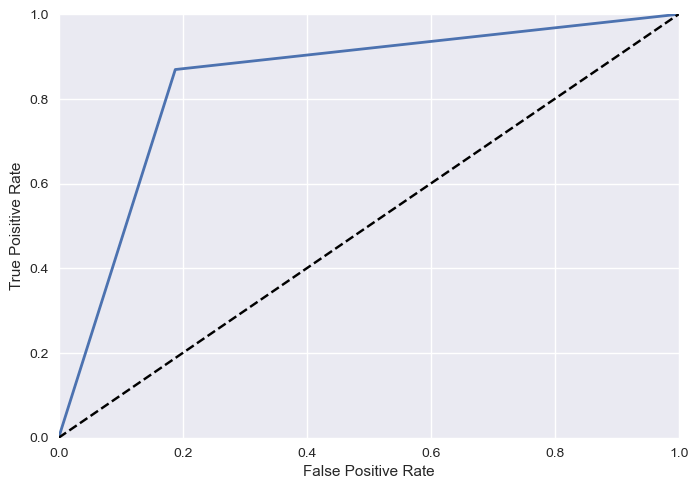

In [46]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_svc, tpr_svc, "SVC")
plt.show()

In [47]:
roc_auc_score(y_train, y_train_pred)

0.8406420865967195

#### We evaluate the model with test set:

<AxesSubplot:>

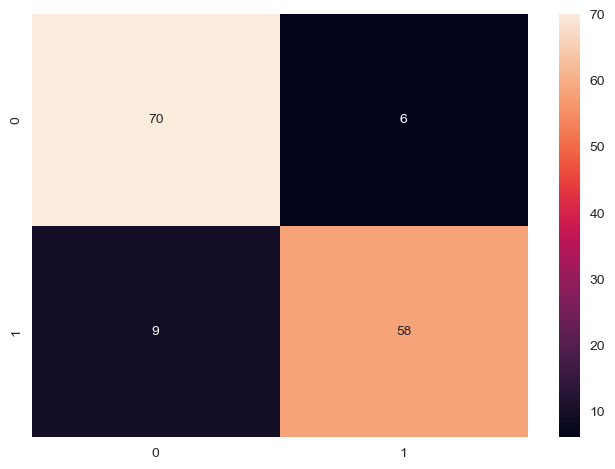

In [48]:
y_test_pred = cross_val_predict(best_svc_clf, X_test, y_test, cv=cv)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

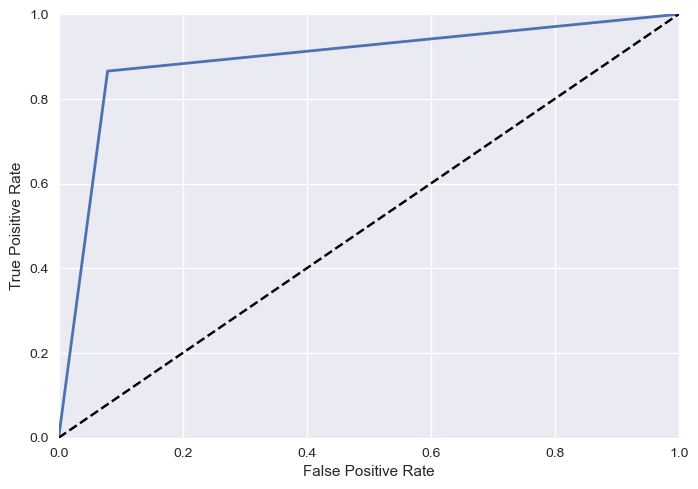

In [49]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_svc, tpr_svc, "SVC")
plt.show()

In [50]:
roc_auc_score(y_test, y_test_pred)

0.893362136684996

#### We calculate the scores

In [51]:
svc_scores = print_scores(y_test, y_test_pred)

Accuracy: 89.5104895104895
Precision: 90.625
Recall: 86.56716417910447
F1-score: 89.49189200358863


## üü¢ Random Forest Classifier

#### We train the model

In [52]:
nFeatures = len(X_train.columns)
param_grid = [{"n_estimators":[25, 50, 75],
               'criterion':['gini','entropy'],
               "max_features":[nFeatures-10, nFeatures-5]
              }]
rf_clf = RandomForestClassifier(random_state=42)
grid_forest = GridSearchCV(rf_clf, param_grid, cv=cv, scoring=metric)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': [28, 33],
                          'n_estimators': [25, 50, 75]}],
             scoring='recall')

In [53]:
best_rf_clf = grid_forest.best_estimator_
grid_forest.best_params_

{'criterion': 'entropy', 'max_features': 28, 'n_estimators': 25}

<AxesSubplot:>

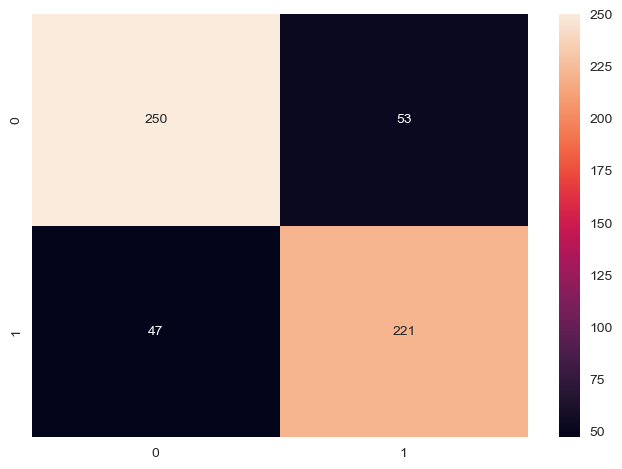

In [54]:
y_train_pred = cross_val_predict(best_rf_clf, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

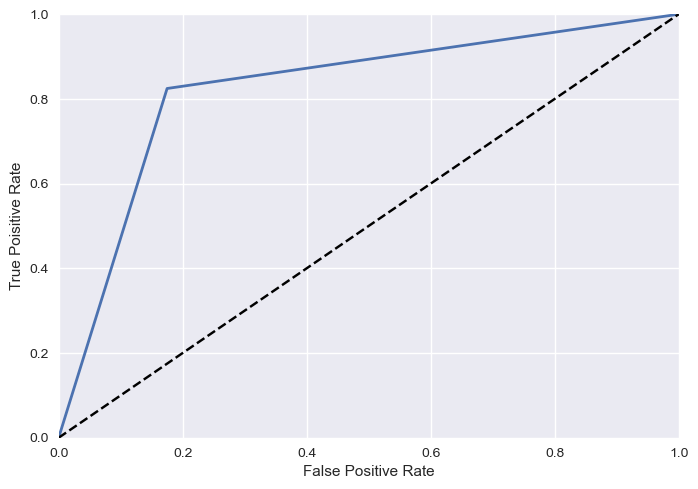

In [55]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [56]:
roc_auc_score(y_train, y_train_pred)

0.8248546869612334

#### We evaluate the model with test set:

<AxesSubplot:>

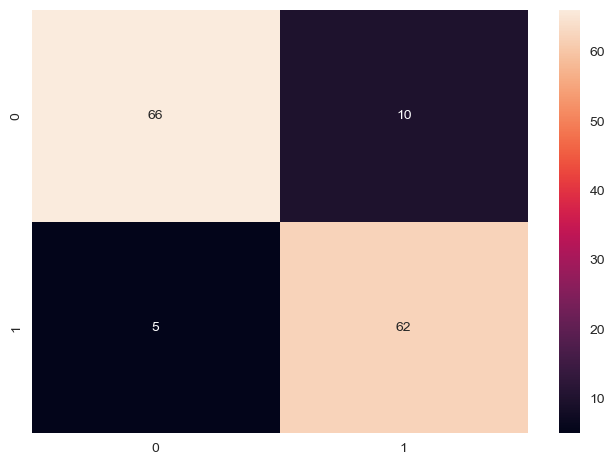

In [57]:
y_test_pred = cross_val_predict(best_rf_clf, X_test, y_test, cv=cv)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

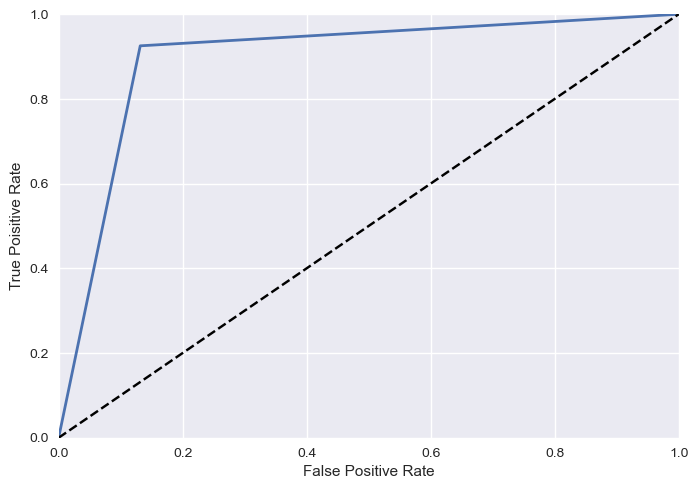

In [58]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [59]:
roc_auc_score(y_test, y_test_pred)

0.8968970934799686

#### We calculate the scores

In [60]:
rf_scores = print_scores(y_test, y_test_pred)

Accuracy: 89.5104895104895
Precision: 86.11111111111111
Recall: 92.53731343283582
F1-score: 89.52075673555633


## üìè Model Score Comparisons

In [61]:
scores = pd.DataFrame(data=[list(lgr_scores.values()), list(knn_scores.values()), list(svc_scores.values()), list(rf_scores.values())], columns=list(lgr_scores.keys()))
scores = scores.transpose()
scores = scores.rename(columns={0:"Logistic Regression", 1:"K-Nearest Neighbors", 2:"Support Vector Machine", 3:"Random Forest"})
scores.style.highlight_max(color='green', axis = 1)

According to the confusion matrix above, in this case, we want to avoid FN as much as possible. Since we would be determining that the patient has normal condition, ignoring the possibility of CVD and exposing the patient to the risk of death. For this reason, we will focus to reduce these type of predictions.
However, the amount of predictions of type FP shouldn't be too large since our model will be very useless.
The score that help us to analysis the amount of predictions of type FN is the recall where:

$Recall = \frac{TP}{TP + FN}\quad\text{if}\quad FN \rightarrow 0 \Longrightarrow Recall \rightarrow 1$

$Precision = \frac{TP}{TP + FP}\quad\text{if}\quad FP \rightarrow 0 \Longrightarrow Precision \rightarrow 1$

$F1 = \frac{TP}{TP + \frac{FN + FP}{2}}\quad\text{if}\quad FN, FP \rightarrow 0 \Longrightarrow F1 \rightarrow 1$

### Optimising for Recall or Precision? <br>
$\rightarrow $ **Recall**: The ability of a model to find all the relevant cases within a data set. The number of true positives divided by the number of true positives plus the number of false negatives.
In most high-risk detection cases (like this heart failure detection), recall is a more important evaluation metric than precision.